In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd

In [3]:
titanic_train = pd.read_csv("/kaggle/input/titanic-dataset/train.csv")

type(titanic_train)

pandas.core.frame.DataFrame

In [4]:
titanic_train.shape      # Check dimensions

(891, 12)

In [5]:
titanic_train.head(6)    # Check the first 6 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [6]:
titanic_train.tail(6)   # Check the last 6 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [10]:
titanic_train.index = titanic_train["Name"]  # Set index to name
del titanic_train["Name"] 

In [11]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
titanic_train.describe()    # Summarize the first 6 columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, Braund, Mr. Owen Harris to Dooley, Mr. Patrick
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


In [17]:
# Load in some packages
%matplotlib inline


import numpy as np
import pandas as pd
import os

In [18]:
titanic_train = pd.read_csv("/kaggle/input/titanic-dataset/train.csv")      # Read the data

In [19]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
categorical = titanic_train.dtypes[titanic_train.dtypes == "object"].index
print(categorical)

titanic_train[categorical].describe()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [22]:
del titanic_train["PassengerId"]     # Remove PassengerId

In [23]:
titanic_train["Name"].describe()

count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: Name, dtype: object

In [24]:
titanic_train["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [25]:
del titanic_train["Ticket"]        # Remove Ticket

In [26]:
titanic_train["Cabin"][0:15]       # Check the first 15 tickets


0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object

In [27]:
titanic_train["Cabin"].describe()  # Check number of unique cabins

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [28]:
new_survived = pd.Categorical(titanic_train["Survived"])
new_survived = new_survived.rename_categories(["Died","Survived"])              

new_survived.describe()

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


In [29]:
new_Pclass = pd.Categorical(titanic_train["Pclass"],
                           ordered=True)

new_Pclass = new_Pclass.rename_categories(["Class1","Class2","Class3"])     

new_Pclass.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [30]:
titanic_train["Pclass"] = new_Pclass

In [31]:
titanic_train["Cabin"].unique()   # Check unique cabins

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [32]:
char_cabin = titanic_train["Cabin"].astype(str) # Convert data to str

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter

new_Cabin = pd.Categorical(new_Cabin)

new_Cabin .describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [33]:
titanic_train["Cabin"] = new_Cabin

In [34]:
titanic_train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [35]:
missing = np.where(titanic_train["Age"].isnull() == True)
missing

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888]),)

In [39]:
len(missing[0])

177

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

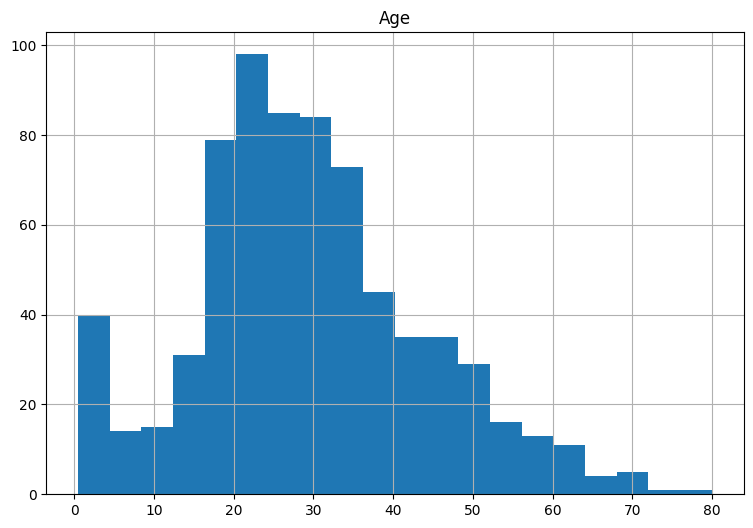

In [40]:
titanic_train.hist(column='Age',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

In [41]:
new_age_var = np.where(titanic_train["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       titanic_train["Age"])     # Value if check is false

titanic_train["Age"] = new_age_var 

titanic_train["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

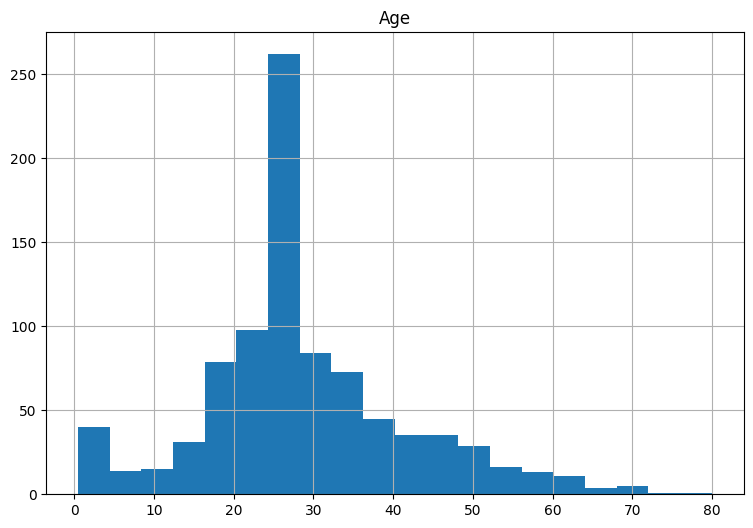

In [42]:
titanic_train.hist(column='Age',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

<Axes: >

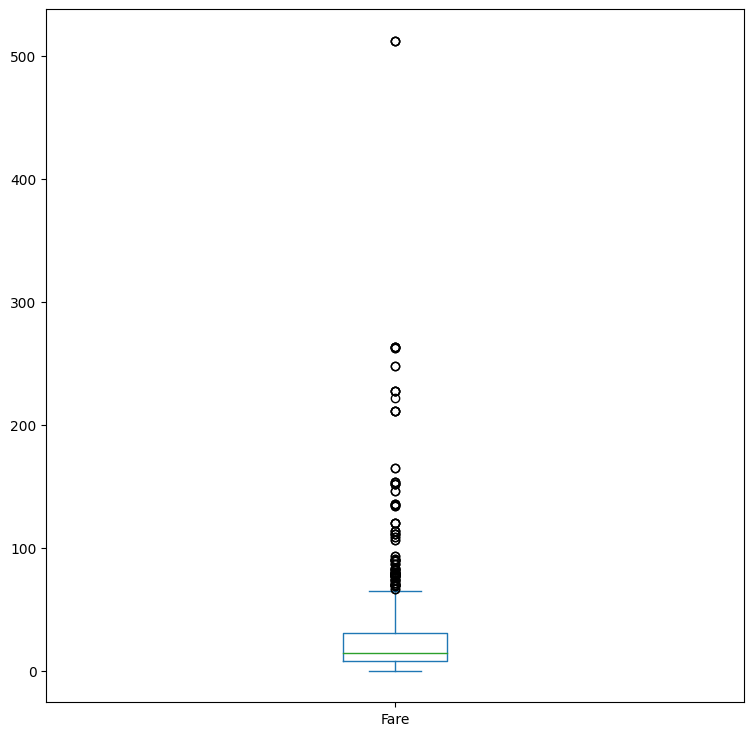

In [43]:
titanic_train["Fare"].plot(kind="box",
                           figsize=(9,9))

In [44]:
index = np.where(titanic_train["Fare"] == max(titanic_train["Fare"]) )

titanic_train.loc[index]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,1,Class1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,n,C
679,1,Class1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B,C
737,1,Class1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B,C


In [45]:
titanic_train["Family"] = titanic_train["SibSp"] + titanic_train["Parch"]

In [46]:
most_family = np.where(titanic_train["Family"] == max(titanic_train["Family"]))

titanic_train.loc[most_family]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
159,0,Class3,"Sage, Master. Thomas Henry",male,28.0,8,2,69.55,n,S,10
180,0,Class3,"Sage, Miss. Constance Gladys",female,28.0,8,2,69.55,n,S,10
201,0,Class3,"Sage, Mr. Frederick",male,28.0,8,2,69.55,n,S,10
324,0,Class3,"Sage, Mr. George John Jr",male,28.0,8,2,69.55,n,S,10
792,0,Class3,"Sage, Miss. Stella Anna",female,28.0,8,2,69.55,n,S,10
846,0,Class3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,69.55,n,S,10
863,0,Class3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,69.55,n,S,10


In [47]:
my_tab = pd.crosstab(index=titanic_train["Survived"],  # Make a crosstab
                     columns="count")                  # Name the count column

my_tab

col_0,count
Survived,
0,549
1,342


In [48]:
type(my_tab)             # Confirm that the crosstab is a DataFrame

pandas.core.frame.DataFrame

In [49]:
pd.crosstab(index=titanic_train["Pclass"],  # Make a crosstab
            columns="count")                # Name the count column

col_0,count
Pclass,
Class1,216
Class2,184
Class3,491


In [50]:
pd.crosstab(index=titanic_train["Sex"],     # Make a crosstab
                      columns="count")      # Name the count column

col_0,count
Sex,
female,314
male,577


In [51]:
cabin_tab = pd.crosstab(index=titanic_train["Cabin"],  # Make a crosstab
                        columns="count")               # Name the count column

cabin_tab

col_0,count
Cabin,
A,15
B,47
C,59
D,33
E,32
F,13
G,4
T,1
n,687


In [52]:
titanic_train.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [53]:
print (cabin_tab.sum(), "\n")   # Sum the counts

print (cabin_tab.shape, "\n")   # Check number of rows and cols

cabin_tab.iloc[1:7]             # Slice rows 1-6

col_0
count    891
dtype: int64 

(9, 1) 



col_0,count
Cabin,
B,47
C,59
D,33
E,32
F,13
G,4


In [54]:
cabin_tab/cabin_tab.sum()

col_0,count
Cabin,
A,0.016835
B,0.052750
C,0.066218
D,0.037037
E,0.035915
F,0.014590
G,0.004489
T,0.001122
n,0.771044


In [55]:
# Table of survival vs. sex
survived_sex = pd.crosstab(index=titanic_train["Survived"], 
                           columns=titanic_train["Sex"])

survived_sex.index= ["died","survived"]

survived_sex

Sex,female,male
died,81,468
survived,233,109


In [56]:
# Table of survival vs passenger class
survived_class = pd.crosstab(index=titanic_train["Survived"], 
                            columns=titanic_train["Pclass"])

survived_class.columns = ["class1","class2","class3"]
survived_class.index= ["died","survived"]

survived_class

,class1,class2,class3
died,80,97,372
survived,136,87,119


In [57]:
# Table of survival vs passenger class
survived_class = pd.crosstab(index=titanic_train["Survived"], 
                            columns=titanic_train["Pclass"],
                             margins=True)   # Include row and column totals

survived_class.columns = ["class1","class2","class3","rowtotal"]
survived_class.index= ["died","survived","coltotal"]

survived_class

,class1,class2,class3,rowtotal
died,80,97,372,549
survived,136,87,119,342
coltotal,216,184,491,891


In [58]:
survived_class/survived_class.loc["coltotal","rowtotal"]

,class1,class2,class3,rowtotal
died,0.089787,0.108866,0.417508,0.616162
survived,0.152637,0.097643,0.133558,0.383838
coltotal,0.242424,0.206510,0.551066,1.000000


In [59]:
survived_class/survived_class.loc["coltotal"]

,class1,class2,class3,rowtotal
died,0.37037,0.527174,0.757637,0.616162
survived,0.62963,0.472826,0.242363,0.383838
coltotal,1.00000,1.000000,1.000000,1.000000


In [60]:
survived_class.div(survived_class["rowtotal"],
                   axis=0)

,class1,class2,class3,rowtotal
died,0.145719,0.176685,0.677596,1.0
survived,0.397661,0.254386,0.347953,1.0
coltotal,0.242424,0.206510,0.551066,1.0


In [61]:
survived_class.T/survived_class["rowtotal"]

,died,survived,coltotal
class1,0.145719,0.397661,0.242424
class2,0.176685,0.254386,0.206510
class3,0.677596,0.347953,0.551066
rowtotal,1.000000,1.000000,1.000000


In [62]:
surv_sex_class = pd.crosstab(index=titanic_train["Survived"], 
                             columns=[titanic_train["Pclass"],
                                      titanic_train["Sex"]],
                             margins=True)   # Include row and column totals

surv_sex_class

Pclass   Class1      Class2      Class3       All
Sex      female male female male female male     
Survived                                         
0             3   77      6   91     72  300  549
1            91   45     70   17     72   47  342
All          94  122     76  108    144  347  891

In [70]:
surv_sex_class/surv_sex_class.loc["All"]    # Divide by column total

Pclass      Class1              Class2           Class3                 All
Sex         female      male    female      male female      male          
Survived                                                                   
0         0.031915  0.631148  0.078947  0.842593    0.5  0.864553  0.616162
1         0.968085  0.368852  0.921053  0.157407    0.5  0.135447  0.383838
All       1.000000  1.000000  1.000000  1.000000    1.0  1.000000  1.000000